## Mean-Variance Approach
---

The minimum variance portfolio problem is formulated as follows.

$$
\begin{split}
 \min_{w}\quad & \sigma_P^2=w^{\intercal}\Sigma w, \\
 \text{subject to}\quad
 & \text{(a)}\ w^{\intercal}\mu = \mu_P, \\
 & \text{(b)}\ w^{\intercal}\iota = 1, \\
 & \text{(c)}\ w\geqq 0,
\end{split}
$$

where

$$
 w = \begin{bmatrix} w_1 \\ \vdots \\ w_N \end{bmatrix}, \quad 
 \mu = \begin{bmatrix} \mu_1 \\ \vdots \\ \mu_N \end{bmatrix}, \quad 
 \Sigma = \begin{bmatrix} \sigma_1^2 & \cdots & \sigma_{1N} \\
 \vdots & \ddots & \vdots \\
 \sigma_{N1} & \cdots & \sigma_N^2 \\
 \end{bmatrix}.
$$

+ $\mu$ - mean vector
+ $\Sigma$ - covariance matrix
+ $\iota$ - vector whose elements are all equal to one

## Minimum Variance Frontier
---

`numpy.linalg` is a NumPy module of linear algebra.

In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In the following cell, the mean vector `Mean`, the covariance matrix `Sigma` are defined. Note that
`Stdev` is a vector of standard deviations and `diag` create a diagonal matrix from a vector. So

```Python
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
```

creates the covariance matrix `Sigma` we need. `@` is the operator for matrix multiplication.

`iota` is a vector whose elements are all equal to one.

In [2]:
Mu = np.array([1.0, 3.0, 1.5, 6.0, 4.5])
Stdev = np.array([5.0, 10.0, 7.5, 15.0, 11.0])
CorrMatrix = np.array([[1.00, 0.25, 0.18, 0.10, 0.25],
                       [0.25, 1.00, 0.36, 0.20, 0.20],
                       [0.18, 0.36, 1.00, 0.25, 0.36],
                       [0.10, 0.20, 0.25, 1.00, 0.45],
                       [0.25, 0.20, 0.36, 0.45, 1.00]])
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)
print(Sigma)

[[ 25.     12.5     6.75    7.5    13.75 ]
 [ 12.5   100.     27.     30.     22.   ]
 [  6.75   27.     56.25   28.125  29.7  ]
 [  7.5    30.     28.125 225.     74.25 ]
 [ 13.75   22.     29.7    74.25  121.   ]]


`inv` is a function to compute the inverse of a matrix. Note that in Python `@` is applicable as long as the length of a vector matches the length of the corresponding row/column of a matrix. So we do not need to apply the traspose operator `T` to `Mu` or `iota`.

In [3]:
inv_Sigma = la.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2

In general no closed-form solution is available for the minimum variance portfolio problem. However, if we drop (c), the solution is given by

$$
 w = 
 \frac{C\mu_P-A}{D}\Sigma^{-1}\mu + \frac{B-A\mu_P}{D}\Sigma^{-1}\iota,
$$

where

$$
 A =\mu^{\intercal}\Sigma^{-1}\iota,\ B=\mu^{\intercal}\Sigma^{-1}\mu,\ 
 C =\iota^{\intercal}\Sigma^{-1}\iota,\ D = B C - A^2.
$$

Then we have the following relationship between $\mu_P$ and $\sigma_P$:

$$
 \sigma_P = \sqrt{\frac{C\mu_P^2 - 2A\mu_P + B}{D}}
 = \sqrt{\frac{C}{D}\left(\mu_P-\frac{A}{C}\right)^2+\frac1{C}}.
$$

Therefore the minimum variance frontier is given by

$$
\mu_P = \begin{cases}
\displaystyle
\frac{A + \sqrt{D(C\sigma_P^2 - 1)}}{C}, & \mu_P > \frac{A}{C}; \\
& \\
\displaystyle
\frac{A - \sqrt{D(C\sigma_P^2 - 1)}}{C}, & \mu_P < \frac{A}{C}.
\end{cases}
$$

In [4]:
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight[idx, :] = (C * Target_Return - A) / D * la.solve(Sigma, Mu) \
                       + (B - A * Target_Return) / D * la.solve(Sigma, iota)
    V_Risk[idx] = (C / D) * (Target_Return - A / C) ** 2 + 1.0 / C
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_inefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C

The upper half of the minimum variance frontier is called the <font color=red>efficient frontier</font> because the expected return is higher on the upper half than the lower half at any given level of the risk (standard deviation). In contrast to the efficient froniter, we refer to the lower half of the minimum variance frontier as the inefficient frontier, though this term is not commonly used in the field of finance.

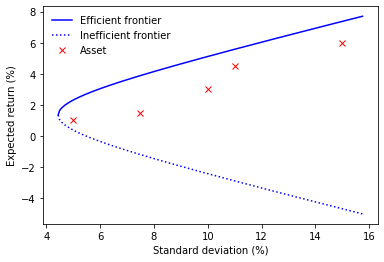

In [5]:
fig1 = plt.figure(1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'b-', label='Efficient frontier')
plt.plot(sigma_p, mu_p_inefficient, 'b:', label='Inefficient frontier')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx', label='Asset')
plt.legend(loc='best', frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.show()